# Figure S1: Mapping of the problem to the unit simplex helps optimizing long-term growth rate graphically.

Goal: review a simpler, but less general graphical method due to Donaldson-Matasci et.al.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']
from matplotlib import colors as mplcolors
from matplotlib import transforms

import sys
sys.path.append('lib/')
import plotting

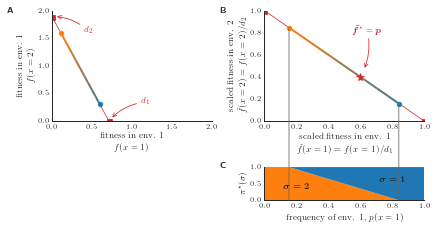

In [2]:
ms = 8

fig, axes = plt.subplots(figsize=(6.0, 3.25), ncols=2, nrows=2, gridspec_kw=dict(height_ratios=[1.0, 0.3]))

F = np.array([[0.11, 1.6], [0.6, 0.3]])
c = np.linalg.inv(F).sum(axis=1)
C = np.diag(c)
Ftilde = F.dot(C)
p = np.array([0.6, 0.4])
fstar = p / c

def plotpoints(ax, F):
    cmap = mplcolors.LinearSegmentedColormap.from_list('mycmap', [colors[1], colors[0]])
    x, y = plotting.highrespoints(F[:, 0], F[:, 1])
    plotting.colorline(x, y, ax=ax, cmap=cmap, linewidth=2.0)
    ax.plot(F[0, 0], F[0, 1], 'o', c=colors[1], markeredgecolor=colors[1])
    ax.plot(F[1, 0], F[1, 1], 'o', c=colors[0], markeredgecolor=colors[0])

ax = axes[0, 0]
ax.plot([0, 1/c[0]], [1/c[1], 0], '-s', c=colors[3], markeredgecolor=colors[3], lw=.75, ms=5, zorder=-10)
arrowprops = dict(facecolor=colors[3], edgecolor=colors[3],
                  arrowstyle="->", connectionstyle="arc3,rad=+0.2", shrinkB=5)
ax.annotate('$d_2$', xy=[0, 1/c[1]], xytext=[0.4, 1/c[1]-0.3], color=colors[3], arrowprops=arrowprops)
ax.annotate('$d_1$', xy=[1/c[0], 0], xytext=[1/c[0]+0.4, 0.3], color=colors[3], arrowprops=arrowprops)
plotpoints(ax, F)
ax.set_xlabel('fitness in env. 1\n$f(x=1)$')
ax.set_ylabel('fitness in env. 1\n$f(x=2)$')
ax.set_xlim(0.0, 2.0)
ax.set_ylim(0.0, 2.0)

ax = axes[0, 1]
ax.plot([0, 1], [1, 0], '-s', c=colors[3], markeredgecolor=colors[3], lw=.75, ms=5, zorder=-10)
plotpoints(ax, Ftilde)
ax.plot(p[0], p[1], '*', c=colors[3], markeredgecolor=colors[3], ms=ms)
arrowprops = dict(edgecolor=colors[3], arrowstyle="->", connectionstyle="arc3,rad=-0.2", shrinkB=10)
ax.annotate(r'$\boldsymbol{\tilde f}^\star = \boldsymbol p$',
            xy=p,
            xytext=[0.55, 0.8], color=colors[3],
            arrowprops=arrowprops)
ax.set_xlabel('scaled fitness in env. 1\n'+r'$\tilde f(x=1) = f(x=1) / d_1$')
ax.set_ylabel('scaled fitness in env. 2\n'+r'$\tilde f(x=2) = f(x=2) / d_2$')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)

ax = axes[1, 1]
p = [0]
p.extend(Ftilde[:, 0])
p.append(1.0)
piopts = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])
ax.stackplot(p, tuple(piopts.T), colors=[colors[1], colors[0]], edgecolor='None')
ax.locator_params(nbins=3, axis='y')
ax.set_xlabel(r'frequency of env. 1, $p(x=1)$')
ax.set_ylabel(r'$\pi^\star(\sigma)$')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
labelkwargs = dict(color=black, va='center', ha='center')
ax.text(0.2, 0.4, r'$\bm{\sigma = 2}$', **labelkwargs)
ax.text(0.8, 0.6, r'$\bm{\sigma = 1}$', **labelkwargs)

arrowprops = dict(edgecolor='.4', arrowstyle='-', shrinkA=0, shrinkB=0, clip_on=False)
blendedtransform = transforms.blended_transform_factory(axes[1, 1].transData, axes[0, 1].transData)
axes[1, 1].annotate("", xy=(Ftilde[0, 0], 0.0), xytext=(Ftilde[0, 0], Ftilde[0, 1]), textcoords=blendedtransform,
     arrowprops=arrowprops, alpha=.5)
axes[1, 1].annotate("", xy=(Ftilde[1, 0], 0.0), xytext=(Ftilde[1, 0], Ftilde[1, 1]), textcoords=blendedtransform,
     arrowprops=arrowprops, alpha=.5)

axes[1, 0].axison = False
flataxes = [axes[0, 0], axes[0, 1], axes[1, 1]]
for ax in flataxes:
    plotting.despine(ax)
plotting.label_axes(flataxes, xy=(-0.28, 0.975))
fig.tight_layout()
fig.savefig('svgs/mapping.svg')

**Mapping of the problem to the unit simplex helps optimizing long-term growth rate graphically.**
            To determine the best strategy using two phenotypes (blue/orange dots) and their mixtures (colored line) we rescale the original fitnesses (A) such that the sum of fitnesses is constant (B).
            To do so fitnesses are rescaled by dividing through the intercepts (red squares) of the line passing through the two points with the axes (red line). 
            In the scaled fitnesses the optimal strategy has fitness vector $\boldsymbol{\tilde f}^\star = \boldsymbol p$ (red star), which can be be mapped back to the original problem by reverting the rescaling.
            Where the so-determined fitnesses lie between the fitnesses of the two phenotypes the optimal strategy switches between both phenotypes with frequencies relative to how far the optimum is from the two pure phenotypes.
            If the optimal rescaled fitness lies outside a pure strategy using the closest phenotype is optimal.
            (C) Optimal mixture of the two phenotypes as a function of the frequency of environmental state $1$. 